### min_max_scaler
standard normalization은 아웃라이어의 영향을 덜 받음<br>
min_max_scaler와 달리 특정값의 범위를 가지지는 않지만 평균이0, 분산이 1인 분포를 따름

In [31]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm_notebook
import sklearn.preprocessing

In [32]:
# dataframe display 옵션
pd.set_option('display.max_columns' , 30)
pd.set_option('display.width', None)

In [33]:
data = pd.read_csv('./data/final3/final3_duo_Data.csv', dtype={                  
					'matchType' : 'int8',
					'match_size' : 'int16',
					'assists_ratio' : 'float32',
					'boosts_ratio' : 'float32',
					'headshotKills_ratio': 'float32',
					'heals_ratio' : 'float32',
					'kills_ratio' : 'float32',
					'killStreaks_ratio' : 'float32',
					'longestKill_ratio' : 'float32',
					'rideDistance_ratio' : 'float32',
					'swimDistance_ratio' : 'float32',
					'walkDistance_ratio' : 'float32',
					'weaponsAcquired_ratio' : 'float32',
					'headshotKillrate_ratio' : 'float32',
					'DBNOs_ratio' : 'float32',
					'revives_ratio' : 'float32',
					'winPlacePerc' : 'float32',
					
                })
train_df, test_df = train_test_split(data, train_size = 0.8)

In [36]:
# null값 확인 및 
# inplace=False로 하면 기존 혹은 새로운 변수에 할당해야 하고, inplace = True 하면 해당변수에 적용됨
# na가 포함된 행을 제거하는 것은 데이터 소실이 크기 때문에 inplace=False가 default
train_df.dropna(inplace = True)
print(train_df.isnull().any().any())
test_df.dropna(inplace = True)
print(test_df.isnull().any().any())

False
False


In [38]:
del_list = ['groupId','matchId','matchType']
for col in del_list:
    del other_train_df[col] # 한 번만 실행
    del other_test_df[col] # 한 번만 실행

In [46]:
total_ncol = len(other_train_df.columns)

train_np = np.array(other_train_df)
test_np = np.array(other_test_df)

# 데이터 전 처리. 표준졍규화 값으로 스케일링.
scaler = sklearn.preprocessing.minmax_scale

x_train = scaler(train_np[:,1:-1]) # fit : 표준화하기 위한 평균과 분산을 구하기 위함
y_train = train_np[:,[-1]]
print('pass')

x_test = scaler(test_np[:,1:-1]) # id, groupId, matchid 제외
y_test = test_np[:,[-1]]
print('pass')

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, total_ncol-2]) # id, winplaceperc 제외
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_uniform([total_ncol-2, 1],-1.,1.), name='weight')
b = tf.Variable(tf.random_uniform([1],-1.,1.), name='bias')

# Hypothesis(model)
hypothesis = tf.matmul(X, W) + b
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.AdamOptimizer(learning_rate=0.05)
train = optimizer.minimize(cost)

# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    for step in tqdm_notebook(range(4001)): #1000번 정도 돌리면 학습이 완료됨
        cost_val, hy_val, _ = sess.run(
            [cost, hypothesis, train], feed_dict={X: x_train, Y: y_train})
        if step % 200 == 0:
            print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)
    Weight = sess.run(W)
    print("W\t" , Weight)
    y_predict = sess.run(hypothesis, feed_dict={X:x_test})
    print("Predict\t", y_predict)

pass
pass


0 Cost:  0.58237445 
Prediction:
 [[ 0.4500574 ]
 [-0.6754719 ]
 [ 0.37359613]
 ...
 [ 0.39940202]
 [-0.17327523]
 [-0.23613685]]
100 Cost:  0.11633531 
Prediction:
 [[0.5951237 ]
 [0.43275174]
 [0.20312259]
 ...
 [0.22225535]
 [0.31957924]
 [0.7260463 ]]
200 Cost:  0.08310211 
Prediction:
 [[0.48916492]
 [0.558688  ]
 [0.15663448]
 ...
 [0.14984497]
 [0.3662748 ]
 [0.8316135 ]]
300 Cost:  0.07295734 
Prediction:
 [[0.467734  ]
 [0.5822958 ]
 [0.16822743]
 ...
 [0.1511257 ]
 [0.38695526]
 [0.87708384]]
400 Cost:  0.06851589 
Prediction:
 [[0.46901605]
 [0.5821558 ]
 [0.18354926]
 ...
 [0.1629793 ]
 [0.39581373]
 [0.8992731 ]]
500 Cost:  0.066227585 
Prediction:
 [[0.47444156]
 [0.5767398 ]
 [0.19546324]
 ...
 [0.1744737 ]
 [0.39959806]
 [0.9082747 ]]
600 Cost:  0.06490673 
Prediction:
 [[0.47922492]
 [0.5705872 ]
 [0.2041181 ]
 ...
 [0.18401119]
 [0.40111375]
 [0.90948045]]
700 Cost:  0.06407867 
Prediction:
 [[0.4824729 ]
 [0.5648667 ]
 [0.21042392]
 ...
 [0.19167206]
 [0.4015919 ]
 [

In [48]:
test_id = pd.DataFrame(other_test_df['Id'])
test_winPlacePerc = pd.DataFrame(other_test_df['winPlacePerc'])
y_predict_df = pd.DataFrame(y_predict,index = test_id.index, columns=['predict'])
diff = pd.DataFrame(other_test_df['winPlacePerc']-y_predict_df['predict'],
                   columns=['diff'])

mae = sum(abs(diff['diff']))/diff['diff'].count() # Mean absolute error

result = pd.DataFrame({'Id':test_id['Id'],'winPlacePerc':test_winPlacePerc['winPlacePerc'], 
                       'predict':y_predict_df['predict'],'diff':diff['diff'],'MAE':mae})
# result.to_csv("./result/final_3/final3_duo_MLR.csv", sep=',', encoding='utf-8')
print(result.head())
print('Mae\t : ', mae)

                   Id  winPlacePerc   predict      diff       MAE
16965  a3ca935a03bc5a      0.242432  0.264191 -0.021760  0.200827
15163  a708e7ee5ff345      0.222168  0.123784  0.098384  0.200827
16479  1e15a389eee371      0.510742  0.473239  0.037503  0.200827
11758  7774fff44d189a      0.125000  0.158567 -0.033567  0.200827
2950   03ab727f2c06a9      0.352783  0.501764 -0.148981  0.200827
Mae	 :  0.20082711566765277


### kaggle 50 rank mse : 0.0207... we have to go further

### solo 경기 회귀계수### 

In [42]:
Weight_df = pd.DataFrame(Weight,columns=['Weight'])
col_df = pd.DataFrame(other_train_df.columns[1:-1],columns=['Variable'])
regress_df = pd.DataFrame([Weight_df['Weight'],col_df['Variable']],)
regress_df.transpose()

,Weight,Variable
0,0.0627224,assists
1,0.309054,boosts
2,-0.20301,DBNOs
3,0.0184056,heals
4,0.412562,kills
5,0.054638,killStreaks
6,0.00159933,revives
7,0.0251096,weaponsAcquired
8,0.0246879,longestKill_log
9,0.136493,rideDistance_log


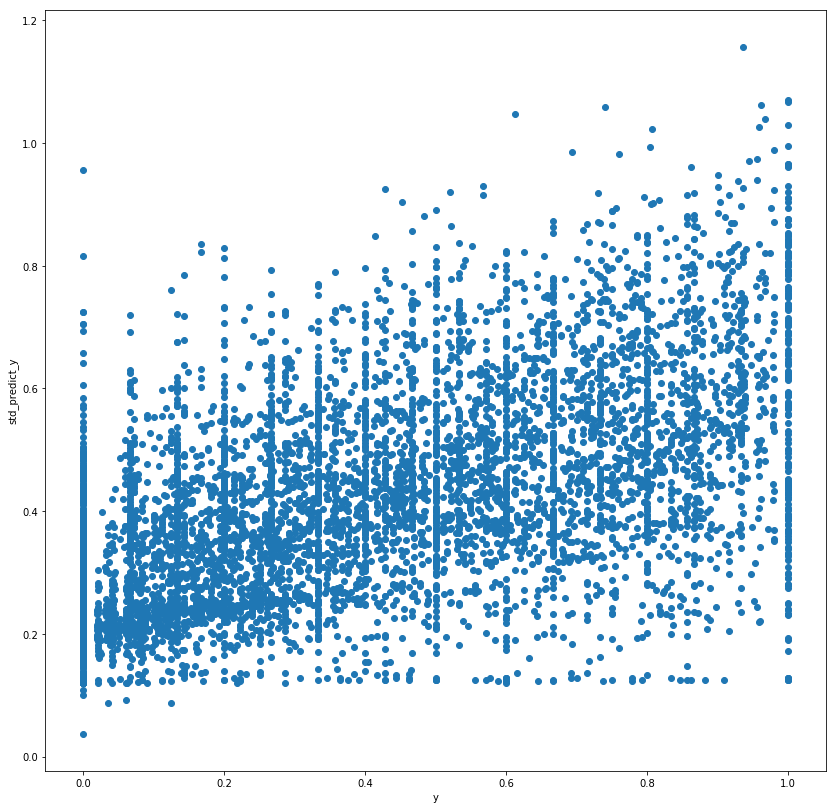

In [49]:
f, ax = plt.subplots(figsize=(14, 14))
plt.scatter(result['winPlacePerc'], result['predict'])
plt.xlabel("y")
plt.ylabel("std_predict_y")
# plt.savefig("./graph/final_3/final3_duo_MLR.png")
plt.show()

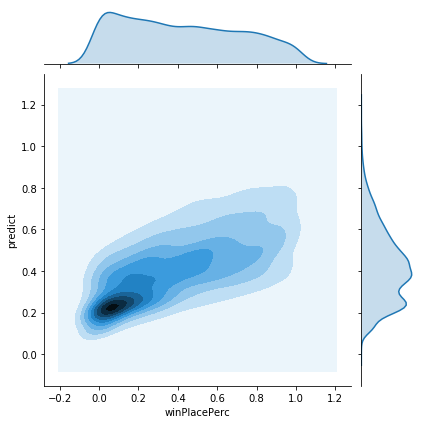

In [51]:
# 회귀분석은 1의값은 예측을 잘하지만, 가운데 값과 0의 값은 예측을 잘하지 못함
sns_plot = sns.jointplot(x= 'winPlacePerc', y= 'predict', data=result, kind='kde')
# sns_plot.savefig("./graph/final_3/final3_duo_MLR_kde.png")